# AGGREGATE KPI AND VISUALIZE DATA

In [3]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to Python path to allow module imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.kpi import aggregate_kpis
from src.utils.visualization import visualize_summary, visualize_customer_segments, visualize_temporal_trends, visualize_trip_characteristics, visualize_geographical_analysis, visualize_years

## KPI data of a month
**Objective:** Load the cleaned January data and flag data, apply the `aggregate_kpis` function (from `src.utils.kpi`).
* **Aggregate KPIs:** Compute key performance indicators such as total revenue, number of trips, average fare, etc., at daily, weekly, and monthly levels.
* **Display summaries:** Show the head of each aggregated dataframe (daily, weekly, monthly) for initial inspection and verification.

### Daily

In [ ]:
df1 = pd.read_parquet('../processed/cleaned_data/cleaned_yellow_tripdata_2021-01.parquet')
df1_flag = pd.read_parquet('../processed/flags_for_analysis/flag_yellow_tripdata_2021-01.parquet')
df1_kpi = aggregate_kpis(df1, df1_flag)
df1_kpi_Daily = df1_kpi['Daily']
df1_kpi['Daily'].head()

### Weekly

In [ ]:
df1_kpi['Weekly'].head()

### Monthly

In [ ]:
df1_kpi['Monthly'].head()

## KPI 12 months

In [ ]:
# List of months for 2021
months = [f"{i:02d}" for i in range(1, 13)]

# Define output file paths
daily_csv = "../reports/kpi_daily_2021.csv"
weekly_csv = "../reports/kpi_weekly_2021.csv"
monthly_csv = "../reports/kpi_monthly_2021.csv"

# Check if files already exist
if os.path.exists(daily_csv) and os.path.exists(weekly_csv) and os.path.exists(monthly_csv):
    print()
else:
    print("Starting KPI report processing for 2021...")
    daily_list = []
    weekly_list = []
    monthly_list = []

    # Create directory if it doesn't exist
    os.makedirs("../reports/", exist_ok=True)

    for month in months:
        print(f"Reading and aggregating data for month: 2021-{month}")
        df = pd.read_parquet(f"../processed/cleaned_data/cleaned_yellow_tripdata_2021-{month}.parquet")
        df_flags = pd.read_parquet(f"../processed/flags_for_analysis/flag_yellow_tripdata_2021-{month}.parquet")
        
        df_kpi = aggregate_kpis(df, df_flags)
        
        daily_list.append(df_kpi['Daily'])
        weekly_list.append(df_kpi['Weekly'])
        monthly_list.append(df_kpi['Monthly'])

    print("Concatenating all monthly data...")
    # Concatenate all months
    daily_all = pd.concat(daily_list, ignore_index=True)
    weekly_all = pd.concat(weekly_list, ignore_index=True)
    monthly_all = pd.concat(monthly_list, ignore_index=True)

    print("Saving processed reports to CSV...")
    # Save to CSV files
    if os.path.exists(daily_csv):
        print(f"Overwriting existing KPI report: {daily_csv}")
    if os.path.exists(weekly_csv):
        print(f"Overwriting existing KPI report: {weekly_csv}")
    if os.path.exists(monthly_csv):
        print(f"Overwriting existing KPI report: {monthly_csv}")
    daily_all.to_csv(daily_csv, index=False)
    weekly_all.to_csv(weekly_csv, index=False)
    monthly_all.to_csv(monthly_csv, index=False)
    
    print("KPI reports for 2021 have been successfully created.")

## Visualization of a month
**Objective:** Apply visualization functions to the cleaned January data and aggregated KPIs.
* **Visualize summary:** Generate plots for revenue per day, trips per day, and trips per week heatmap using `visualize_summary`.
* **Visualize customer segments:** Create charts for payment type distribution, passenger count distribution, and tip correlation matrix using `visualize_customer_segments`.
* **Visualize temporal trends:** Plot average speed per hour, trips per hour, and revenue per hour using `visualize_temporal_trends`.
* **Visualize trip characteristics:** Display distributions for trip distance and trip duration using `visualize_trip_characteristics`.
* **Visualize geographical analysis:** Show top 10 pickup and dropoff zones using `visualize_geographical_analysis`.

In [ ]:
df1_visuals1 = visualize_summary(df1, df1_kpi_Daily)

In [ ]:
df1_visuals2 = visualize_customer_segments(df1, df1_flag)

In [ ]:
df1_visuals3 = visualize_temporal_trends(df1, df1_flag)

In [ ]:
df1_visuals4 = visualize_trip_characteristics(df1, df1_flag)

In [ ]:
df1_visuals5 = visualize_geographical_analysis(df1, df1_flag)

## Visualize 12 months

In [ ]:

months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_names = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}

for month in months:
    month_folder = os.path.join('../figures', f'{month_names[month]}_figures')
    
    # Check if the folder exists and is not empty to avoid redundant processing
    if os.path.exists(month_folder) and len(os.listdir(month_folder)) > 0:
        continue 

    print(f"Processing month: {month} ({month_names[month]})")
    
    # Load datasets
    df = pd.read_parquet(f'../processed/cleaned_data/cleaned_yellow_tripdata_2021-{month}.parquet')
    df_flag = pd.read_parquet(f'../processed/flags_for_analysis/flag_yellow_tripdata_2021-{month}.parquet')
    
    # Aggregate KPIs
    df_kpi = aggregate_kpis(df, df_flag)
    df_kpi_Daily = df_kpi['Daily']
    
    # Create directory for the specific month
    os.makedirs(month_folder, exist_ok=True)
    
    # Define visualization tasks: (function, arguments, target_filenames)
    vis_tasks = [
        (visualize_summary, [df, df_kpi_Daily], 
         ['revenue_per_day.png', 'trips_per_day.png', 'trips_per_week_heatmap.png']),
        
        (visualize_customer_segments, [df, df_flag], 
         ['payment_type_distribution.png', 'daily_group_ride_demand.png', 'tip_correlation_matrix.png']),
        
        (visualize_temporal_trends, [df, df_flag], 
         ['avg_speed_per_hour.png', 'trips_per_hour.png', 'revenue_per_hour.png']),
        
        (visualize_trip_characteristics, [df, df_flag], 
         ['trip_distance_distribution.png', 'trip_duration_distribution.png']),
        
        (visualize_geographical_analysis, [df, df_flag], 
         ['top10_pickup_zones.png', 'top10_dropoff_zones.png'])
    ]

    # Execute plotting and save figures
    for func, args, filenames in vis_tasks:
        func(*args)
        fig_nums = plt.get_fignums()
        for i, fig_num in enumerate(fig_nums):
            if i < len(filenames):
                fig = plt.figure(fig_num)
                if not os.path.exists(os.path.join(month_folder, filenames[i])):
                    fig.savefig(os.path.join(month_folder, filenames[i]), dpi=300, bbox_inches='tight')
                plt.close(fig)

    print(f"Successfully saved all figures for {month_names[month]} to {month_folder}")
    print("-" * 50)

## Visualize year

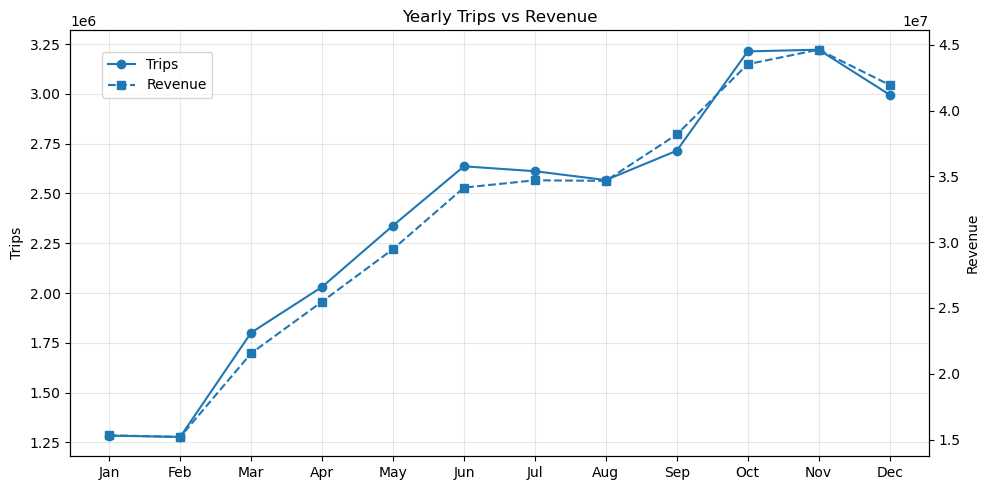

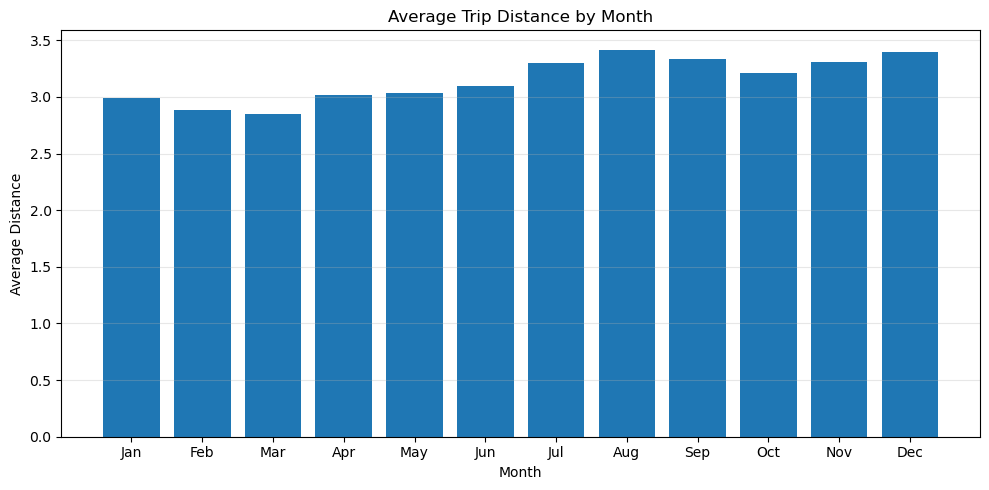

In [ ]:
df_year = pd.read_csv('../reports/kpi_monthly_2021.csv')

# Create output directory for yearly visualizations
output_dir = '../figures/2021'
os.makedirs(output_dir, exist_ok=True)

visualize_years(df_year)

# Define filenames for the yearly visualizations
filenames = [
    'revenue_vs_trip.png',
    'trip_distance_whole_year.png',
]

# Save figures with check for existing files
for i, fig_num in enumerate(plt.get_fignums()):
    fig = plt.figure(fig_num)
    if i < len(filenames):
        filepath = os.path.join(output_dir, filenames[i])
        if not os.path.isfile(filepath):
            fig.savefig(filepath, dpi=300, bbox_inches='tight')
        else:
            continue
    plt.close(fig)